In [ ]:
import pandas as pd

In [45]:
bankCsv = "drive/MyDrive/Dataset/bank.csv"
medicalDataset = "drive/MyDrive/Dataset/medical_student.csv"
titanic_path = "drive/MyDrive/Dataset/Titanic-Dataset.csv"
# performanceDataset = "drive/MyDrive/Dataset/medical_student.csv"



In [ ]:

df = pd.read_csv("drive/MyDrive/Dataset/bank.csv")
print("Info of the Data Frame:")
print(df.info())

Info of the Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [ ]:
object_cols = df.select_dtypes(include = ["object"])
print("\nColumns with dtype object:", list(object_cols))


Columns with dtype object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
for col in object_cols:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())



Unique values in column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in column 'marital':
['married' 'single' 'divorced']

Unique values in column 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in column 'default':
['no' 'yes']

Unique values in column 'housing':
['yes' 'no']

Unique values in column 'loan':
['no' 'yes']

Unique values in column 'contact':
['unknown' 'cellular' 'telephone']

Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in column 'poutcome':
['unknown' 'failure' 'other' 'success']

Unique values in column 'y':
['no' 'yes']


In [ ]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
df_numeric = df.select_dtypes(exclude='object')
df_numeric.to_csv("drive/MyDrive/Dataset/banknumericdata.csv", index=False)
print("\nNumeric DataFrame saved as 'banknumericdata.csv'.")


Numeric DataFrame saved as 'banknumericdata.csv'.


In [ ]:
# Step 4: Read numeric CSV and get summary statistics
df_numeric_read = pd.read_csv("drive/MyDrive/Dataset/banknumericdata.csv")
print("\nSummary statistics of numeric data:")
print(df_numeric_read.describe())


Summary statistics of numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0

**Problem 2 - Data Imputation**

In [ ]:
df.info()

print("\nMissing values in each column:")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Missing values in each column:


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df = df.fillna(df.median(numeric_only=True))


In [ ]:
df = df.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == "object" else col)

In [ ]:
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates().reset_index(drop=True)


Duplicate rows: 0


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**3.2 Exercises - Data Cleaning and Transformations**

***Problem 1***

In [20]:
df = pd.read_csv(titanic_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
subset_df = df[["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]]
subset_df.head()


,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


In [22]:
first_class = subset_df[ subset_df["Pclass"] == 1 ]
first_class.head()

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [23]:
mean_fare = first_class["Fare"].mean()
median_fare = first_class["Fare"].median()
max_fare = first_class["Fare"].max()
min_fare = first_class["Fare"].min()

mean_fare, median_fare, max_fare, min_fare


(np.float64(84.1546875), 60.287499999999994, 512.3292, 0.0)

In [24]:
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


***Problem - 2***

In [25]:
# Count missing (null) values in 'Age'
null_age_count = subset_df['Age'].isnull().sum()
print("Number of null values in 'Age':", null_age_count)


Number of null values in 'Age': 177


In [28]:
subset_df_clean = subset_df.dropna(subset=['Age']).reset_index(drop=True)

subset_df_clean['Age'].isnull().sum()


np.int64(0)

In [27]:
subset_df_clean.info()
subset_df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      714 non-null    object 
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 33.6+ KB


,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


***Problem - 3***

In [29]:
df['Embarked'].unique()
df['Embarked'].isnull().sum()


np.int64(2)

In [30]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
embarked_dummies.head()


,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [31]:
df = pd.concat([df, embarked_dummies], axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


In [32]:
df = df.drop('Embarked', axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [34]:
df = df.drop('Embarked', axis=1, errors='ignore')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [35]:
df.head()
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

***Problem - 4***

In [36]:
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
mean_survival_by_sex


,Survived
Sex,
female,0.742038
male,0.188908


In [39]:
import matplotlib.pyplot as plt
import numpy as np

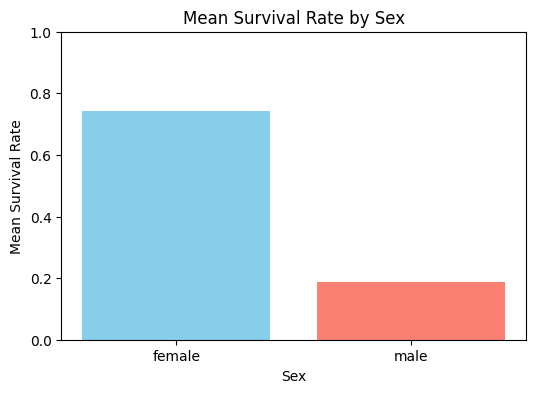

In [40]:
labels = mean_survival_by_sex.index
values = mean_survival_by_sex.values

x = np.arange(len(labels))

plt.figure(figsize=(6,4))
plt.bar(x, values, color=['skyblue', 'salmon'])
plt.xticks(x, labels)
plt.ylabel('Mean Survival Rate')
plt.xlabel('Sex')
plt.title('Mean Survival Rate by Sex')
plt.ylim(0,1)
plt.show()


***Problem - 5***

In [47]:
df = pd.read_csv(titanic_path)
mean_survival = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
mean_survival


Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.689655
male,0.305263,0.073171,0.174603


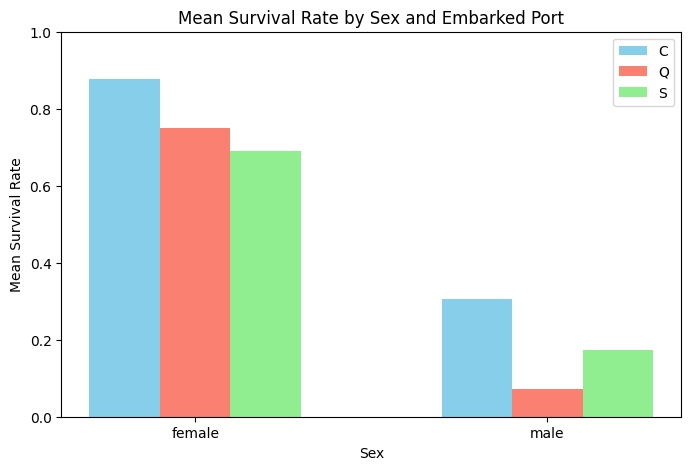

In [48]:
labels = mean_survival.index
C = mean_survival['C']
Q = mean_survival['Q']
S = mean_survival['S']

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width, C, width, label='C', color='skyblue')
ax.bar(x, Q, width, label='Q', color='salmon')
ax.bar(x + width, S, width, label='S', color='lightgreen')

ax.set_ylabel('Mean Survival Rate')
ax.set_xlabel('Sex')
ax.set_title('Mean Survival Rate by Sex and Embarked Port')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,1)
ax.legend()

plt.show()


***Problem - 6***

In [49]:
df['AgeGroup'] = pd.qcut(df['Age'], q=5)
df[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,22.0,"(19.0, 25.0]"
1,38.0,"(31.8, 41.0]"
2,26.0,"(25.0, 31.8]"
3,35.0,"(31.8, 41.0]"
4,35.0,"(31.8, 41.0]"


In [52]:
mean_survival = df.groupby(['AgeGroup', 'Pclass'], observed=False)['Survived'].mean().unstack()
mean_survival



Pclass,1,2,3
AgeGroup,,,
"(0.419, 19.0]",0.809524,0.742857,0.333333
"(19.0, 25.0]",0.761905,0.400000,0.197674
"(25.0, 31.8]",0.666667,0.416667,0.283582
"(31.8, 41.0]",0.777778,0.461538,0.166667
"(41.0, 80.0]",0.506667,0.363636,0.088235


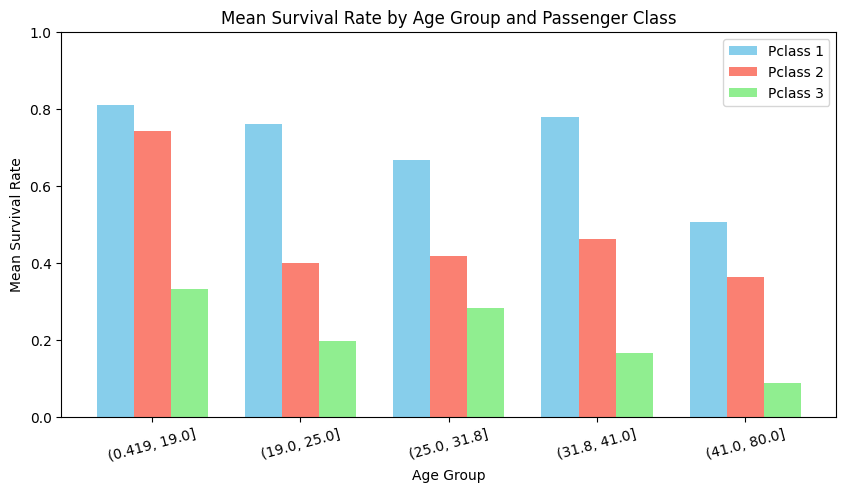

In [51]:
labels = mean_survival.index.astype(str)
p1 = mean_survival[1]
p2 = mean_survival[2]
p3 = mean_survival[3]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width, p1, width, label='Pclass 1', color='skyblue')
ax.bar(x, p2, width, label='Pclass 2', color='salmon')
ax.bar(x + width, p3, width, label='Pclass 3', color='lightgreen')

ax.set_ylabel('Mean Survival Rate')
ax.set_xlabel('Age Group')
ax.set_title('Mean Survival Rate by Age Group and Passenger Class')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.set_ylim(0,1)
ax.legend()

plt.show()